In [1]:
import numpy as np

from mereldet import Optimizer, calculate_cost, function_under_test, MUT_SCALE
from matplotlib import pyplot as plt

In [2]:
def create_training_data(n=10_000, size=2):
    rng = np.random.default_rng(seed=1234)
    return rng.uniform(low=-1, high=1, size=(n, size))

In [3]:
def plot_convergence(optimizer):
    plt.loglog(optimizer.trace["iteration"], optimizer.trace["cost"], label="cost")
    plt.loglog(optimizer.trace["iteration"], optimizer.trace["mean_dist"], label="|f(g(x)) - f(x)|")
    plt.xlabel("Iteration count")
    plt.legend()

In [4]:
input = create_training_data()

CPU times: user 55.1 s, sys: 374 ms, total: 55.4 s
Wall time: 55.5 s


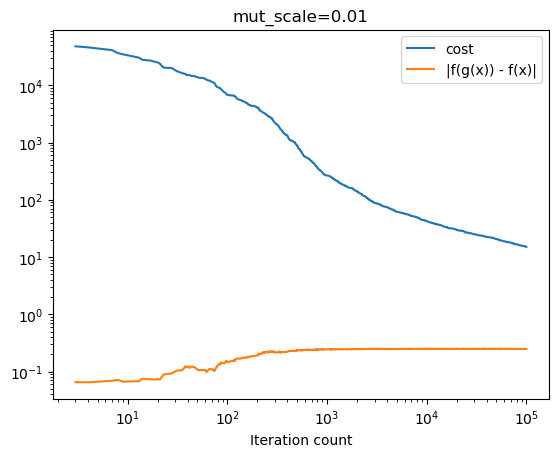

In [5]:
optimizer = Optimizer(function_under_test["prod"], calculate_cost, input)
%time mr = optimizer.optimize(mut_scale=MUT_SCALE, timeout=100_000)
plot_convergence(optimizer)
plt.title(f"mut_scale={MUT_SCALE}");

CPU times: user 58.6 s, sys: 187 ms, total: 58.8 s
Wall time: 58.8 s


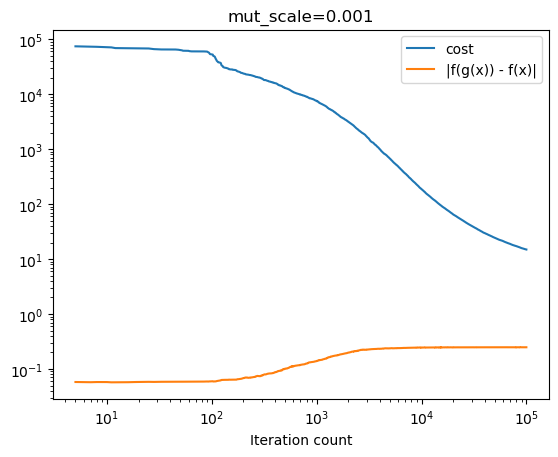

In [6]:
optimizer = Optimizer(function_under_test["prod"], calculate_cost, input)
%time mr = optimizer.optimize(mut_scale=1e-1 * MUT_SCALE, timeout=100_000)
plot_convergence(optimizer)
plt.title(f"mut_scale={1e-1 * MUT_SCALE}");

CPU times: user 1min 10s, sys: 135 ms, total: 1min 10s
Wall time: 1min 10s


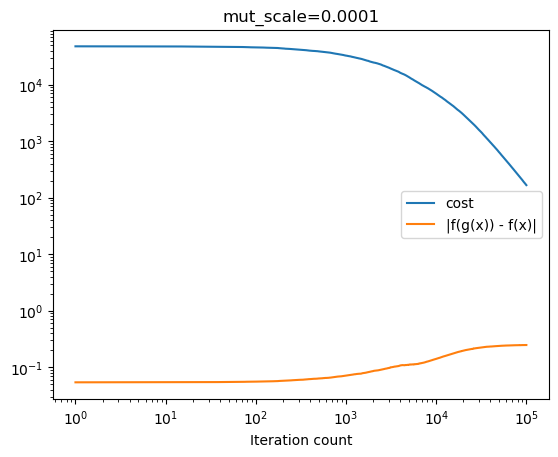

In [7]:
optimizer = Optimizer(function_under_test["prod"], calculate_cost, input)
%time mr = optimizer.optimize(mut_scale=1e-2 * MUT_SCALE, timeout=100_000)
plot_convergence(optimizer)
plt.title(f"mut_scale={1e-2 * MUT_SCALE}");

CPU times: user 55.5 s, sys: 2.1 s, total: 57.6 s
Wall time: 57.6 s


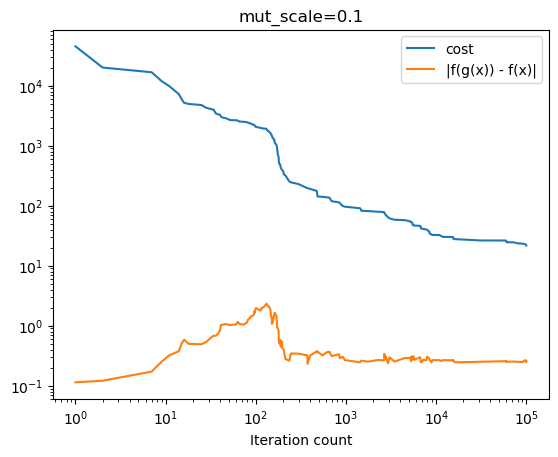

In [8]:
optimizer = Optimizer(function_under_test["prod"], calculate_cost, input)
%time mr = optimizer.optimize(mut_scale=10*MUT_SCALE, timeout=100_000)
plot_convergence(optimizer)
plt.title(f"mut_scale={1e1 * MUT_SCALE}");

In [9]:
mr.scale

array([[ 0.00451479, -0.01726251],
       [ 0.66566353,  2.00016547]])

In [10]:
mr.bias

array([ 1.55438428e-03, -1.09400652e+01])

In [11]:
input[0]

array([ 0.95339953, -0.23960853])

In [12]:
mr(np.array([1, 1]))

array([-0.01119333, -8.27423617])

In [13]:
test = np.array([1., 1.])
print(function_under_test["prod"](test))
print(function_under_test["prod"](mr(test)))

1.0
0.09261625207617621
